In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [67]:
X,y = make_regression(n_features=1,bias=100,noise=20,random_state=10)

In [68]:
class multi:
    def __init__(self, lr =0.1 , iters = 10):
        self.lr = lr
        self.iters = iters
    
    def fit(self,X,y):
        self.coef_ = np.random.randn(X.shape[1],1)
        self.bias_ = np.random.random()
        errors = []
        for i in range(self.iters):
            errors.append(self.gradient_descent(X,y))
        return errors
    
    def gradient_descent(self,X,y):
        delta_bias,delta_coef_,errors = self.gradient(X,y)
        self.coef_+=delta_coef_
        self.bias_+=delta_bias
        return errors
    
    def gradient(self,X,y):
        yh = self.hypo(X)
        y = y.reshape(-1,1)
        mse = np.mean((yh-y)**2)
        dmsedm = np.dot(X.T,(yh-y))/len(X)
        dmsedc = np.mean(2*(yh-y))
        return -dmsedc*self.lr,-dmsedm*self.lr,mse
    
    def hypo(self,X):
        return np.dot(X,self.coef_) + self.bias_
    
    def predict(self,X):
        return self.hypo(X).flatten()

In [69]:
model = multi(lr=0.5,iters=10)
error = model.fit(X,y)

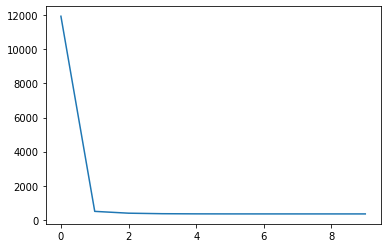

In [70]:
plt.plot(error)

In [71]:
(model.hypo(X)).shape

(100, 1)

In [72]:
(model.predict(X)).shape

(100,)

In [73]:
X.shape

(100, 1)

In [74]:
(model.coef_).shape

(1, 1)

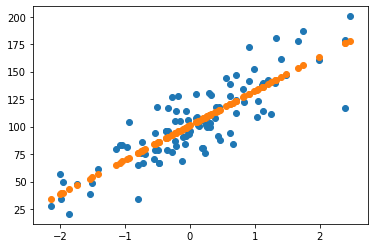

In [78]:
plt.scatter(X,y)
plt.scatter(X,model.predict(X))